In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# for shuffling the data
import random

# for data processing
import numpy as np
import pandas as pd
from PIL import Image

# for model
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from sklearn import metrics

In [3]:
# load the data(img)
X_train = []
Y_train = []
for i in range(3644):
  img = Image.open("resize_total/resize_train_{i}.jpg".format(i=i))
  #img = Image.open("/content/drive/MyDrive/ml_img/resize_total/resize_train_{i}.jpg".format(i=i))
  X_train.append(np.asarray(img))

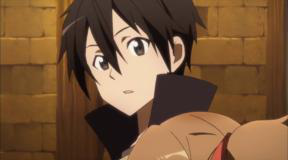

In [ ]:
img

In [4]:
# Y_train
Y_train = []
for i in range(3644):
  if i < 635:
    Y_train.append(int(0))
  elif i >= 635 and i < 1187:
    Y_train.append(int(1))
  elif i >= 1187 and i < 2092:
    Y_train.append(int(2))
  elif i >= 2092 and i < 2754:
    Y_train.append(int(2))
  else:
    Y_train.append(int(3))

In [5]:
# shuffle X_train
shuffle_train = []
for i in range(3644):
  shuffle_train.append((X_train[i], Y_train[i]))
random.shuffle(shuffle_train)

# the real X_train and Y_train
X_train = []
Y_train = []
for i in range(3644):
  X_train.append(shuffle_train[i][0])
  Y_train.append(shuffle_train[i][1])

# convert X_train and Y_train to np.array
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
# preprocess the data

In [6]:
# img information
# 1280 * 720 img size
img_height = 160
img_width = 288

# class number
num_classes = 5

In [7]:
# import package for ResNet50
from tensorflow.keras.applications import ResNet50

In [32]:
# create a model
#from tensorflow.keras.applications import ResNet50

try_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(img_height, img_width, 3), 
    classes = 5, pooling='max', classifier_activation = 'softmax'
)

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", input_shape = (img_height, img_width, 3)),
    layers.RandomRotation(factor = (-0.5, 0.5)),
    layers.RandomZoom(0.3),
  ]
)


my_new_model = Sequential()
my_new_model.add(data_augmentation)
my_new_model.add(try_model)
my_new_model.add(layers.Dense(num_classes, activation='softmax'))

In [19]:
# compile the model
my_new_model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [11]:
my_new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 160, 288, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 23,529,605
Non-trainable params: 45,440
_________________________________________________________________


In [33]:
# make the output shape right
x = layers.Flatten()(try_model.output)
x = layers.Dense(num_classes, activation = 'softmax')(x)
try_model = keras.Model(inputs = try_model.inputs, outputs = x)

In [34]:
# compile the model
try_model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# model summary
try_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 288, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 166, 294, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 80, 144, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 82, 146, 64)  0           ['conv1_conv[0][0]']    

In [35]:
# train the model
epochs=15
try_history = try_model.fit(
  X_train, Y_train, batch_size = 32,
  validation_split = 0.2,
  epochs = epochs
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 60s 596ms/step - loss: 2.5702 - accuracy: 0.6686 - val_loss: 1.1746 - val_accuracy: 0.7147
Epoch 2/15
92/92 [==============================] - 54s 586ms/step - loss: 0.2938 - accuracy: 0.9067 - val_loss: 19.2244 - val_accuracy: 0.2428
Epoch 3/15
92/92 [==============================] - 54s 586ms/step - loss: 0.7221 - accuracy: 0.8497 - val_loss: 0.3044 - val_accuracy: 0.9177
Epoch 4/15
92/92 [==============================] - 54s 586ms/step - loss: 0.1145 - accuracy: 0.9667 - val_loss: 0.1780 - val_accuracy: 0.9465
Epoch 5/15
92/92 [==============================] - 54s 585ms/step - loss: 0.0454 - accuracy: 0.9877 - val_loss: 1.7850 - val_accuracy: 0.6914
Epoch 6/15
92/92 [==============================] - 54s 585ms/step - loss: 0.0634 - accuracy: 0.9815 - val_loss: 0.1874 - val_accuracy: 0.9396
Epoch 7/15
92/92 [==============================] - 54s 585ms/step - loss: 0.0149 - accuracy: 0.9979 - val_loss: 0.1688 - val_accuracy: 0.9396
Epoch 8/1

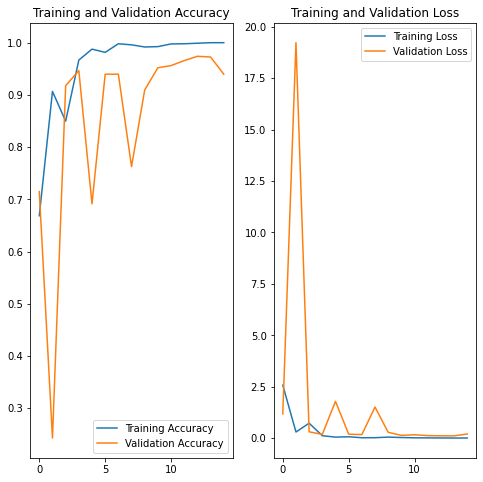

In [36]:
# visualization of the training result
acc = try_history.history['accuracy']
val_acc = try_history.history['val_accuracy']

loss = try_history.history['loss']
val_loss = try_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# train the model
epochs=25
my_new_history = my_new_model.fit(
  X_train, Y_train, batch_size = 32,
  validation_split = 0.2,
  epochs = epochs
)

Epoch 1/25
92/92 [==============================] - 115s 634ms/step - loss: 4.0685 - accuracy: 0.4765 - val_loss: 117.4465 - val_accuracy: 0.2936
Epoch 2/25
92/92 [==============================] - 57s 622ms/step - loss: 0.9477 - accuracy: 0.6600 - val_loss: 15797.1523 - val_accuracy: 0.2401
Epoch 3/25
92/92 [==============================] - 57s 622ms/step - loss: 1.0291 - accuracy: 0.6858 - val_loss: 33.0555 - val_accuracy: 0.5364
Epoch 4/25
92/92 [==============================] - 57s 622ms/step - loss: 0.7032 - accuracy: 0.7784 - val_loss: 0.5775 - val_accuracy: 0.7888
Epoch 5/25
92/92 [==============================] - 57s 622ms/step - loss: 0.5362 - accuracy: 0.8250 - val_loss: 2.5275 - val_accuracy: 0.5514
Epoch 6/25
92/92 [==============================] - 57s 622ms/step - loss: 0.5067 - accuracy: 0.8429 - val_loss: 0.8704 - val_accuracy: 0.7421
Epoch 7/25
92/92 [==============================] - 57s 622ms/step - loss: 0.3194 - accuracy: 0.8916 - val_loss: 0.4295 - val_accuracy

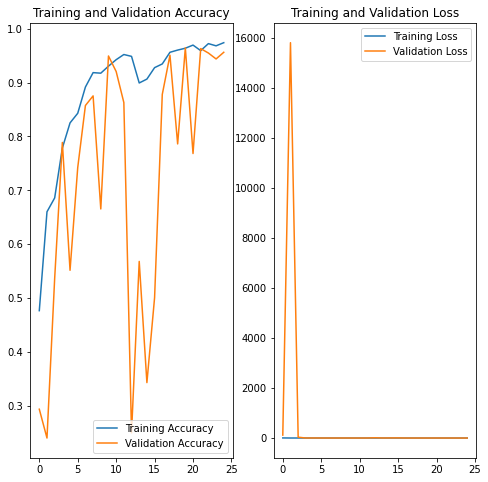

In [28]:
# visualization of the training result
acc = my_new_history.history['accuracy']
val_acc = my_new_history.history['val_accuracy']

loss = my_new_history.history['loss']
val_loss = my_new_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# test imgs from dataset
X_test = []
#Y_train = []
for i in range(171):
  img = Image.open("/content/drive/MyDrive/test/test_{i}.jpg".format(i=i))
  #img.save("test_c.jpg",quality=65)
  X_test.append(np.asarray(img.resize( (288, 160), Image.BILINEAR )))
  #X_test.append(np.asarray(Image.open("/content/drive/MyDrive/test/test_{i}.jpg".format(i=i))))

In [ ]:
X_test = np.array(X_test)

In [25]:
# extra test
test1 = []
img = Image.open("/content/t1.jpg")
#test1 = np.asarray(img)
test1.append(np.asarray(img.resize( (288, 160), Image.BILINEAR )))
test1 = np.array(test1)

In [26]:
t1_prediction = new_model.predict(test1)

In [27]:
t1_prediction

array([[1.7061469e-08, 1.0237735e-06, 9.9999893e-01, 2.2122176e-08,
        1.1520577e-10]], dtype=float32)

In [21]:
# Save the entire model as a SavedModel.
#!mkdir -p saved_model
my_new_model.save("my_new_model", save_format = 'h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [23]:
new_model = tf.keras.models.load_model('my_new_model')

# Show the model architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 160, 288, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 23,529,605
Non-trainable params: 45,440
_________________________________________________________________
